In [85]:
from matplotlib import pyplot as plt
import numpy as np
C=-1.7492230885775337 + 0.0003026488317221822j
f=lambda Z:Z**2+C




X=[0,1.166e-7,1.546e-7,1.749e-7,2.528e-7,6.023e-7,1.040e-6,1.177e-6,8.538e-7,4.626e-8,-2.995e-7,-3.74e-7,-1.841e-6,-3.473e-6,-3.49e-6,-2.43e-6,-1.55e-7,2.98e-5,-.000101,-.000274,-.000414,-.000316,.000303,.00137,.00399,.01319,.01831,.02384,.0428,.066,.146,.17]
Y=[0,7.303e-8,7.433e-8,9.381e-8,1.738e-7,3.966e-7,1.100e-7,-5.279e-7,-1.411e-6,-1.65e-6,-2.001e-6,-3.181e-6,-6.486e-6,-8.166e-6,-1.147e-5,-1.65e-5,-2.28e-5,-7.68e-5,-.000219,-.000174,6.27e-5,.000584,.000733,-7.07e-5,.000387,-.00324,-.00718,-.01182,-.013,.0007,.029,.17]

X_,Y_=[-i for i in X[-1:0:-1]]+X,[-i for i in Y[-1:0:-1]]+Y




import matplotlib.path as mpltPath
Xpath,Ypath=[-10]+X_+[10,10,-10],[-10]+Y_+[10,-10,-10]
polygon=[[x_i,y_i] for x_i,y_i in zip(Xpath,Ypath)]
path = mpltPath.Path(polygon)


def condition_p(Z):
    if abs(Z)<5:
        return path.contains_points([[Z.real,Z.imag]])
    return Z.real>Z.imag



def sqrt(Z,d):
    z=Z**.5
    if condition_p(z):
        return z*d
    return z*d*(-1)


f_inv=lambda Z,d: sqrt(Z-C,d)
f_inv_3=lambda Z,d:f_inv(f_inv(f_inv(Z,1),-1),d)
def f_inv_16(Z,d):
    for i in range(15):
        Z=f_inv_3(Z,-1)
    return f_inv_3(Z,d)
def f_3(Z):
    return f(f(f(Z)))
def f_16(Z):
    for i in range(16):
        Z=f_3(Z)
    return Z

    




try:
    Zlist=[]
except:
    Zlist=[]
Z_0=0
d=0
d2=0
f_inv_old=lambda Z,d: d*(Z-C)**.5
f_inv_3_old=lambda Z,d:f_inv_old(f_inv_old(f_inv_old(Z,1),-1),d)


for i in range(4000000):
    Zlist.append(Z_0)
    d=(np.random.random()*1+.74-.67*d-.24*d2 +.67*d*d2)//1
    d2=(np.random.random()*1+.1+.88*(d2))//1
    #print(d)
    Z_0=[f_inv_old,f_inv_3_old][int(d2)](Z_0, d*2-1)
Z_0=0
for i in range(8000000):
    Zlist.append(Z_0)
    d=(np.random.random()*1+.025+.2*d)//1
    #print(d)
    Z_0=f_inv_3_old(Z_0, d*2-1)
Zs=np.array(Zlist)
#print(Zs)

In [2]:

#region 1: xb0
#pm(z)
#-> any
#p(+++|+++)=?
#p(spiral tail|spiral tail)=0.6799819732594232#area preserving...

#region 2: yb0 and xb1
#pm(-++)^14(z)
#-> xb0, yb0
#p(spiral16|spiral16)=0.6704168119096198#area preserving...

#what are some things:
#+++=right point.................p|=0.0004115014950092021.....0.0743801652892561(+),0.9256198347107439(-)
#++-=right shell spiral head.....p|=~.........................0.0.8752154296918628(-),0.0.12478457030813717(+)
#+-+=center shell spiral head....p|=~.........................0.0.8752154296918628(+),0.0.12478457030813717(-)
#+--=right shell spiral tail.....p|=0.6799819732594232........0.879358163724943(-),0.12064183627505698(+)
#-++=left shell spiral head......p|=xxxxx.....................xxxxx
#-+-=left shell spiral tail......p|=0.6799819732594232........0.879358163724943(-),0.12064183627505698(+)
#--+=center shell spiral tail....p|=0.6799819732594232........0.879358163724943(+),0.12064183627505698(-)
#---=seahorse point..............p|=0.0182423708488163........0.26324517922305324(-),0.7367548207769468(+)

#region 3: yb1
#pm(-+-)(-++)^14(-++)(-+-)(-++)^14
#-> xb0,yb0



#(-++)(xbn)->xbn+1
#+=xb0, --=xb0,-+-=xb0

#(-++)(-+-)(-++)^14 ybn=ybn+1
#+,--,-+-,(-++)(-++)xb{i neq 15},(-++)(-+-)(-++)^{i<14}xb0,(-++)+=yb0
#(-++)--=xb1=yb?


In [82]:
#+++=right point.................p|=0.0004115014950092021.....0.0743801652892561(+),0.9256198347107439(-)
#++-=right shell spiral head.....p|=~.........................0.9355294916205811(-),0.06447050837941892(+)
#+-+=center shell spiral head....p|=~.........................0.9355294916205811(+),0.06447050837941892(-)
#+--=right shell spiral tail.....p|=0.6799819732594232........0.879358163724943(-),0.12064183627505698(+)
#-++=left shell spiral head......p|=xxxxx.....................xxxxx see below
#-+-=left shell spiral tail......p|=0.6799819732594232........0.879358163724943(-),0.12064183627505698(+)
#--+=center shell spiral tail....p|=0.6799819732594232........0.879358163724943(+),0.12064183627505698(-)
#---=seahorse point..............p|=0.0182423708488163........0.26324517922305324(-),0.7367548207769468(+)

#if (-++):
#    if xb0: 0.9355294916205811(+),0.06447050837941892(-)
#    elif yb0: 0.9355294916205811(+twist),0.06447050837941892(-twist)
#    elif not fringe: 0.5(+twist2),0.5(-twist2)
#    else: fake it.
probs={
    '+++':0.0743801652892561,
    '++-':0.06447050837941892,
    '+-+':0.9355294916205811,
    '+--':0.12064183627505698-.09,
    '-+-':0.12064183627505698-.09,
    '--+':0.879358163724943+.09,
    '---':0.7367548207769468,
}
def xb0(S):
    if S[:3]!='-++':
        return True
    elif S[:48]==16*'-++':
        return xb0(S[48:])
    else: return False
def yb0(S):
    if not(S[:3]=='-++' and S[3:6]!='-++'):
        return True
    
    elif not(S[3:99]=='-+-'+'-++'*15+'-+-'+'-++'*15 and not S[99:102]=='-++'):
        return False
    
    elif not (S[99:144]=='-+-'+'-++'*14):
        return True
    
    elif S[:144]==3*('-++'+'-+-'+'-++'*14):
        return yb0(S[144:])
    
def nextmove(S):
    twist=''
    if len(S)<3:
        p=.5
    elif S[:3]!='-++':
        #print('anywhere')
        p=probs[S[:3]]
    elif xb0(S):
        #print('left end')
        p=0.9355294916205811
    elif yb0(S):
        #print('twist1')
        twist='-++'*14
        p=0.9355294916205811
    elif not fringe(S):
        #print('twist2')
        twist='-++'*14+'-++'+'-+-'+'-++'*14
        p=0.5
    else:
        twist='-'*24
        p=.5
    pm='-+'[int(np.random.random()+p)]
    return pm+twist
# S=''
# moves=[]
# for i in range(300):
#     s=nextmove(S)
#     moves.append(s)
#     S=s+S
# #print(moves)
# Z0=0+0j
# pm={'+':1,'-':-1}
# #points=[]
# for move in moves:
#     for d in move[-1::-1]:
#         Z0=f_inv(Z0,pm[d])
#     points.append(Z0)

In [73]:

def createmoves(n,S=''):
    
    moves=[S]
    for i in range(n):
        s=nextmove(S)
        moves.append(s)
        S=s+S
    return moves

def test_array(moves,c):
    #print(moves)
    Z0=0+0j
    pm={'+':1,'-':-1}
    points=c.flatten()
    #print(points[0])
    for move in moves:
        for d in move[-1::-1]:
            for i,point in enumerate(points):
                
                points[i]=(f_inv(point,pm[d]))
        #points.append(cj.copy())


    return points

def test_sequence(moves):
    #print(moves)
    #print(moves)
    Z0=0+0j
    pm={'+':1,'-':-1}
    points=[]
    for move in moves:
        for d in move[-1::-1]:
            Z0=f_inv(Z0,pm[d])
            #print(pm[d])
        points.append(Z0)
    return points

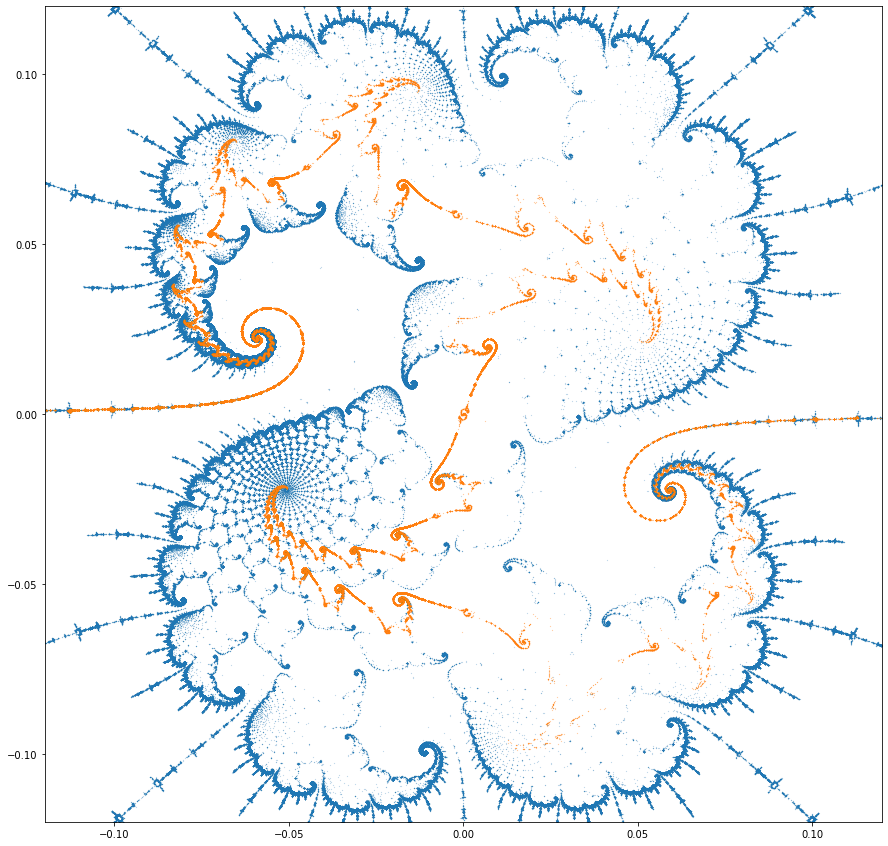

In [91]:
def left_of_shell(S,n=-1):
    if len(S)==0 or n==0:
        return False
    if S[0]=='+':
        return False
    elif len(S)==1 or S[1]=='+':
        return True
    elif len(S)==2 or S[2]=='-':
        return True
    else:
        return left_of_shell(S[3:],n-1)

def fringe(S):
    if S[:4]=='-+++':
        return True
    elif not(S[:5]=='-++--'):
        return False
    else:
        return left_of_shell(S[4:],36)

def createmoves(n,S=''):
    
    moves=[S]
    for i in range(n):
        s=nextmove(S)
        moves.append(s)
        S=s+S
    return moves

def test_sequence(moves):
    #print(moves)
    #print(moves)
    Z0=0+0j
    pm={'+':1,'-':-1}
    points=[]
    for move in moves:
        for d in move[-1::-1]:
            Z0=f_inv(Z0,pm[d])
            #print(pm[d])
        points.append(Z0)
    return points


# xmin,xmax= 0.05, 0.07
# ymin,ymax=-0.03,-0.01
xmin,xmax= -0.12, .12
ymin,ymax=-.12,.12
#moves=createmoves(400000)
try:
    points
except:
    points=[]
#points.extend(test_sequence(moves))
fig=plt.figure(figsize=[15,15])
# ax1=fig.add_subplot(121)
ax2=fig.add_subplot(111)
# ax1.scatter(np.real(Zs),np.imag(Zs),s=.1)
# ax1.scatter(np.real(points),np.imag(points),s=2)
# ax1.set_xlim((xmin,xmax))
# ax1.set_ylim((ymin,ymax))
ax2.scatter(np.real(Zs),np.imag(Zs),s=.01)
ax2.scatter(np.real(points),np.imag(points),s=.02)
ax2.set_xlim((xmin,xmax))
ax2.set_ylim((ymin,ymax))
plt.show()

In [6]:

def getstring(z):
    count=60
    S=''
    while abs(z)<5 and count>0:
        S=S+'-+'[int(condition_p(z))]
        z=f(z)
    return S
